## Example -- IEA Wind 740-10-MW

**IEA Wind TCP Task 55: The IEA Wind 740-10-MW Reference Offshore Wind Plants**

<https://www.osti.gov/biblio/2333634/>

This notebook uses `optiwindnet` to route the collector system cables for the two wind power plants presented in the report above.

This example requires an additional package:

`pip install pyyaml-include`

In [1]:
from pathlib import Path
import numpy as np
import yaml
import yaml_include

In [2]:

from optiwindnet.api import WindFarmNetwork, Heuristic, MetaHeuristic, MILP

load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\amia\AppData\Local\miniconda3\envs\OptiWindNet\Lib\site-packages\ortools\.libs\ortools.dll...


### Additional design parameters

In [3]:
cable_costs = [206, 287, 406]  # [€/m] Costs per distance for each cable type
turbines_per_cable = [3, 5, 7]
cables = [(None, capacity, cost) for capacity, cost in zip(turbines_per_cable, cable_costs)]

### Load layouts from files

In [4]:
wfn_reg = WindFarmNetwork.from_windIO(filepath='data/IEA37_Borssele_Regular_System.yaml', cables=cables)

In [5]:
wfn_irr = WindFarmNetwork.from_windIO(filepath='data/IEA37_Borssele_Irregular_System.yaml', cables=cables)

<Axes: >

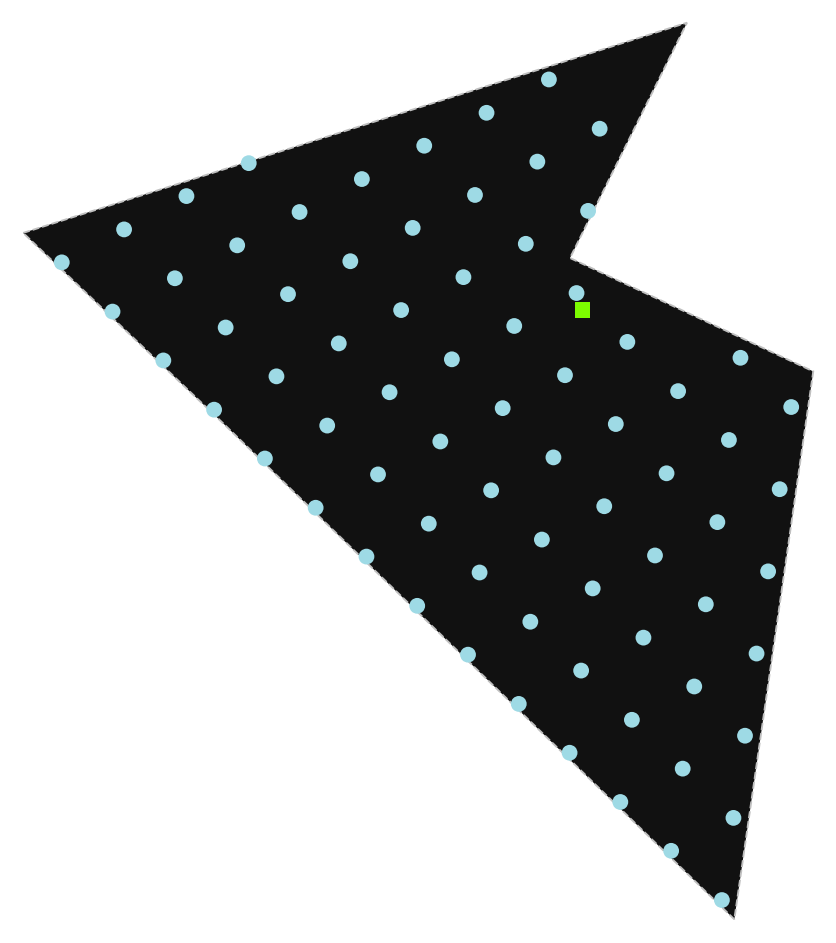

In [6]:
wfn_reg.plot_L()

<Axes: >

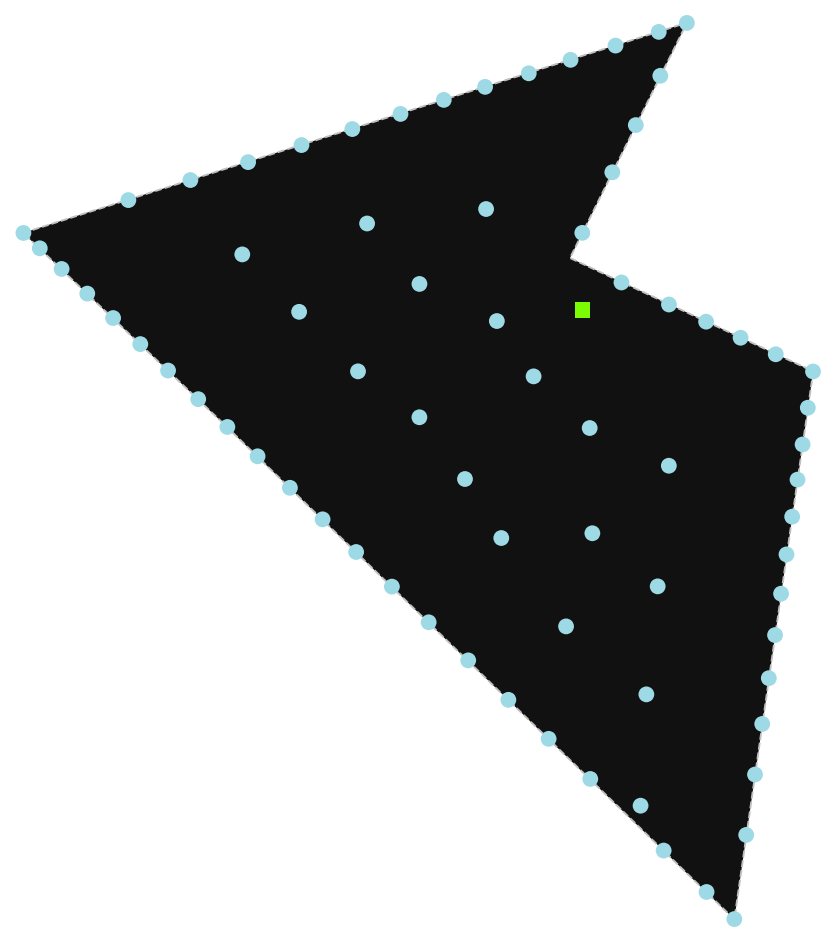

In [7]:
wfn_irr.plot_L()

### Choose solver

In [8]:
main_router = MILP(solver='ortools')

### Regular layout

In [9]:
warmup_router = MetaHeuristic()
wfn_reg.optimize(router=warmup_router)

array([(49, 50, 1699.05676007, 6., False, 2,  689817.04458934),
       (49, -1, 4360.11669667, 7., False, 2, 1770207.37884611),
       (50, 39, 1693.40884935, 5.,  True, 1,  486008.33976308),
       (39, 52, 1693.40871572, 4., False, 1,  486008.30141027),
       (52, 41, 1693.40838202, 3.,  True, 0,  348842.12669682),
       (41, 54, 1693.40802271, 2., False, 0,  348842.05267768),
       (54, 55, 1699.05725522, 1., False, 0,  350005.79457439),
       (-1, 47, 1684.48001112, 6., False, 2,  683898.88451536),
       (-1, 56,  440.73560113, 6., False, 2,  178938.65405862),
       (-1, 46, 1614.56001526, 7., False, 2,  655511.36619545),
       (-1, 33, 2846.00996322, 7., False, 2, 1155480.04506849),
       (-1, 45, 1315.6376393 , 6., False, 2,  534148.88155676),
       (-1, 57, 2102.27386177, 7., False, 2,  853523.18787772),
       (-1, 34, 3601.43168723, 7., False, 2, 1462181.26501404),
       (-1, 24, 5593.27867487, 7., False, 2, 2270871.14199729),
       (-1, 58, 2972.22223039, 7., False

Check the total length of the warm-start solution:

In [ ]:
wfn_reg.length() # value with hge = 139656.4789599965


139656.4789599965

In [ ]:
solver_options=dict(
        max_time_in_seconds = 300,
        relative_gap_limit = 0.005,
        num_workers = 8,

        # be verbose
        log_search_progress = True,
        # required to get the log inside the notebook (goes only to console otherwise)
        log_callback = print,
    )

model_options = {"gateXing_constraint": False,
                 "branching": True,
                 "gates_limit": False}

router = MILP(solver='ortools', solver_options=solver_options, model_options=model_options, detour=True)
res = wfn_reg.optimize(router=router)

s is not None and warmup is run!

Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 300 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model 'IEA37 Borssele Regular System': (model_fingerprint: 0xae073c4b8864bd62)
#Variables: 1'540 (#bools: 422 in floating point objective)
  - 1'118 Booleans in [0,1]
  - 348 in [-6,6]
  - 74 in [0,7]
#kAtMostOne: 341 (#literals: 1'385)
#kLinear1: 2'236 (#enforced: 2'236)
#kLinearN: 77 (#terms: 1'340)

Starting presolve at 0.00s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 422 terms with magnitude in [440.736, 14559.3] average = 3224.76
[Scaling] Objective coefficient relative error: 6.70633e-10
[Scaling] Objective worst-case absolute error: 4.23131e-05
[Scaling] Objective scaling factor: 1.04858e+06
  4.95e-04s  0.00e+00d  [DetectDominanceRelations] 
  9.40e-03s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops=2 #nu

In [12]:
wfn_reg.cost() # originally = 40714260.58298516

40714260.58298516

<Axes: >

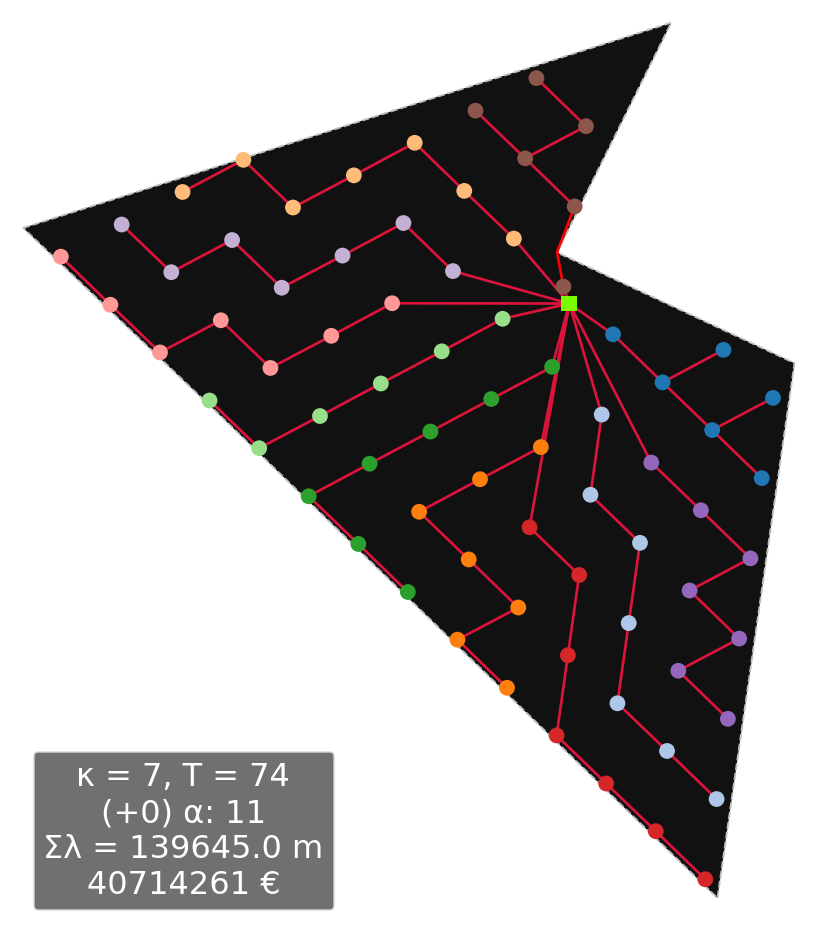

In [13]:
wfn_reg.plot()

### Irregular layout

In [14]:
wfn_irr.optimize(router=warmup_router)

array([(49, -1, 4687.68916842, 7., False, 2, 1903201.80237906),
       (49, 54, 1842.16729532, 6., False, 2,  747919.92189841),
       (54, 30, 3160.60511541, 5.,  True, 1,  907093.66812289),
       (30, 56, 1012.31986112, 4., False, 1,  290535.80014026),
       (56, 31,  967.84790767, 3.,  True, 0,  199376.66898075),
       (31, 26,  998.5320555 , 2.,  True, 0,  205697.60343378),
       (26, 13,  921.16762472, 1.,  True, 0,  189760.53069327),
       (-1, 41, 2832.32641574, 7., False, 2, 1149924.52478849),
       (-1, 71, 1966.52881041, 7., False, 2,  798410.69702702),
       (-1, 28, 2075.87578407, 7., False, 2,  842805.56833268),
       (-1, 55, 1149.408943  , 4., False, 1,  329880.36664067),
       (-1, 39, 1974.91168219, 7., False, 2,  801814.142971  ),
       (-1, 60, 3362.32636738, 7., False, 2, 1365104.50515571),
       (-1, 73, 6811.37746166, 7., False, 2, 2765419.24943212),
       (-1, 70, 6872.51767321, 7., False, 2, 2790242.17532377),
       (-1, 25, 4759.34334533, 7., False

Check the total length of the warm-start solution:

In [ ]:
wfn_irr.length() # originally = 136451.2768186806

136451.2768186806

In [16]:
res_irr = wfn_irr.optimize(router=router) # originally gap: 2.8%


s is not None and warmup is run!

Starting CP-SAT solver v9.12.4544
Parameters: max_time_in_seconds: 300 log_search_progress: true relative_gap_limit: 0.005 num_workers: 8

Initial optimization model 'IEA37 Borssele Irregular System': (model_fingerprint: 0xdfa46d515781f549)
#Variables: 1'192 (#bools: 335 in floating point objective)
  - 857 Booleans in [0,1]
  - 261 in [-6,6]
  - 74 in [0,7]
#kAtMostOne: 232 (#literals: 943)
#kLinear1: 1'714 (#enforced: 1'714)
#kLinear3: 4
#kLinearN: 73 (#terms: 1'067)

Starting presolve at 0.01s
The solution hint is complete and is feasible.
[Scaling] Floating point objective has 335 terms with magnitude in [539.378, 15073.7] average = 3920.79
[Scaling] Objective coefficient relative error: 1.08619e-09
[Scaling] Objective worst-case absolute error: 7.69415e-05
[Scaling] Objective scaling factor: 524288
  7.39e-04s  0.00e+00d  [DetectDominanceRelations] 
  2.04e-02s  0.00e+00d  [operations_research::sat::CpModelPresolver::PresolveToFixPoint] #num_loops

In [17]:
wfn_irr.cost() # 43091183.191651106

43091183.191651106

<Axes: >

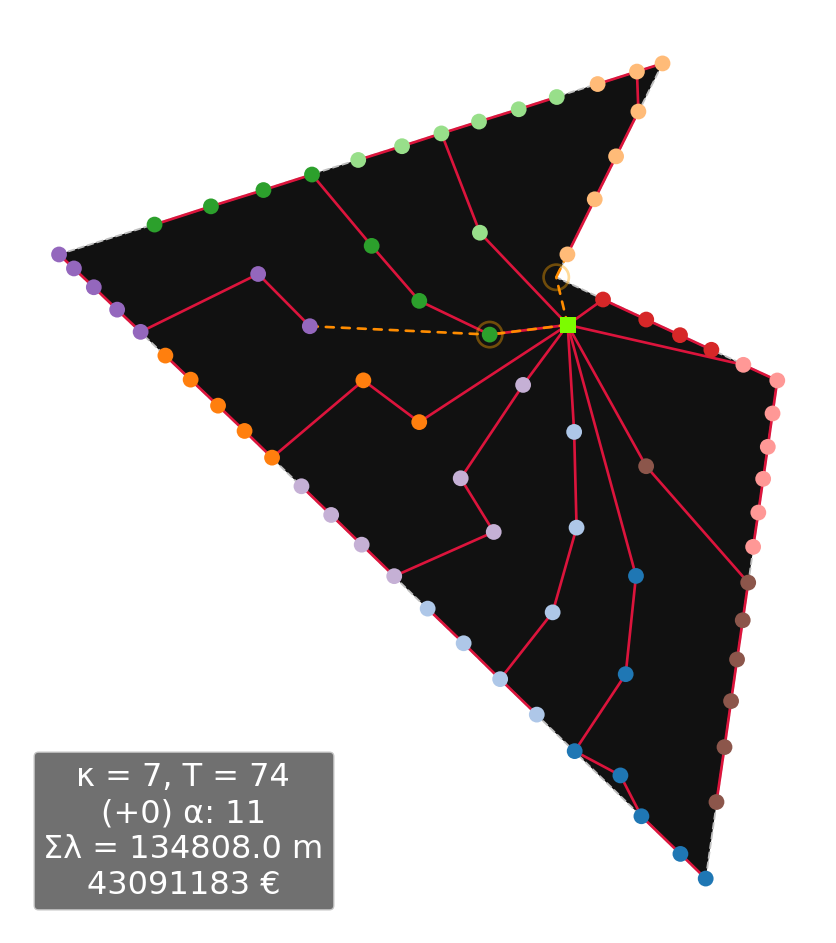

In [18]:
wfn_irr.plot()

### Layouts' edge list

These lists of 3-tuples has all the edges and their cable type (as an index to the `turbines_per_cable` list), i.e. (coordinate_A, coordinate_B, cable_type).

Negative node indices represent substations, the node indices ranging from 0 to 73 represent the WT in the order they were given.

If the layout has contours or detours, indices will go beyond the number of coordinates (WT, SS, borders) provided, and the mapping of these additional indices to indices to the provided coordinates is presented.

In [19]:
network = wfn_reg.get_network_array()
print(network)

[(-1, 47, 1684.48001112, 6., False, 2,  683898.88451536)
 (-1, 56,  440.73560113, 6., False, 2,  178938.65405862)
 (-1, 46, 1614.56001526, 7., False, 2,  655511.36619545)
 (-1, 33, 2846.00996322, 7., False, 2, 1155480.04506849)
 (-1, 45, 1315.6376393 , 6., False, 2,  534148.88155676)
 (-1, 57, 2102.27386177, 7., False, 2,  853523.18787772)
 (-1, 34, 3601.43168723, 7., False, 2, 1462181.26501404)
 (-1, 24, 5593.27867487, 7., False, 2, 2270871.14199729)
 (-1, 49, 4360.11669667, 7., False, 2, 1770207.37884611)
 (-1, 58, 2972.22223039, 7., False, 2, 1206722.22553747)
 (-1, 32, 4404.20513965, 7., False, 2, 1788107.28669926)
 (45, 44, 1699.05648714, 5.,  True, 1,  487629.21180789)
 (33, 23, 1993.85932078, 6.,  True, 2,  809506.88423651)
 (34, 25, 1693.40829361, 6.,  True, 2,  687523.76720764)
 (57, 67, 1693.40802271, 6., False, 2,  687523.65721912)
 (46, 35, 1693.40829361, 6.,  True, 2,  687523.76720764)
 (47, 48, 1699.05723145, 5., False, 1,  487629.42542481)
 (24, 15, 1693.4080948 , 6.,  T

In [20]:
network_cable = np.column_stack((network['src'], network['tgt'], network['cable']))
print(network_cable)


[[-1 47  2]
 [-1 56  2]
 [-1 46  2]
 [-1 33  2]
 [-1 45  2]
 [-1 57  2]
 [-1 34  2]
 [-1 24  2]
 [-1 49  2]
 [-1 58  2]
 [-1 32  2]
 [45 44  1]
 [33 23  2]
 [34 25  2]
 [57 67  2]
 [46 35  2]
 [47 48  1]
 [24 15  2]
 [49 50  2]
 [32 21  2]
 [58 59  2]
 [56 80  1]
 [71 66  0]
 [71 72  0]
 [66 65  1]
 [66 73  0]
 [67 68  1]
 [68 69  1]
 [69 61  0]
 [44 31  0]
 [44 43  0]
 [65 80  1]
 [23 22  1]
 [31 30  0]
 [31 42  0]
 [18 19  0]
 [19 28  0]
 [25 26  1]
 [26 17  1]
 [17 16  0]
 [61 70  0]
 [70 63  0]
 [ 5  4  0]
 [ 5  9  1]
 [ 9 15  1]
 [ 4  1  0]
 [10 11  0]
 [11 16  0]
 [51 62  0]
 [51 60  1]
 [62 53  0]
 [60 59  1]
 [53 64  0]
 [ 3  2  0]
 [ 3  8  0]
 [ 8 14  0]
 [14 22  1]
 [29 38  0]
 [29 40  0]
 [41 52  0]
 [41 54  0]
 [52 39  1]
 [54 55  0]
 [39 50  1]
 [28 27  0]
 [ 6  7  0]
 [ 7 12  0]
 [35 36  1]
 [27 36  1]
 [48 37  1]
 [37 38  0]
 [12 13  0]
 [13 20  1]
 [20 21  1]
 [ 0  1  0]]


Mapping of contour/detour node to the index of its VertexC coordinate :

In [21]:
if wfn_reg.G.graph.get('C') or wfn_reg.G.graph.get('D'):
    R, T, B = (wfn_reg.G.graph[k] for k in 'RTB')
    print(dict(enumerate(
        (n.item() for n in wfn_reg.G.graph['fnT'][T + B:-R]),
        start=T + B
    ))) # originally: {80: 76}

{80: 76}


In [22]:
network = wfn_reg.get_network_array()
network_cable = np.column_stack((network['src'], network['tgt'], network['cable']))
print(network_cable)

[[-1 47  2]
 [-1 56  2]
 [-1 46  2]
 [-1 33  2]
 [-1 45  2]
 [-1 57  2]
 [-1 34  2]
 [-1 24  2]
 [-1 49  2]
 [-1 58  2]
 [-1 32  2]
 [45 44  1]
 [33 23  2]
 [34 25  2]
 [57 67  2]
 [46 35  2]
 [47 48  1]
 [24 15  2]
 [49 50  2]
 [32 21  2]
 [58 59  2]
 [56 80  1]
 [71 66  0]
 [71 72  0]
 [66 65  1]
 [66 73  0]
 [67 68  1]
 [68 69  1]
 [69 61  0]
 [44 31  0]
 [44 43  0]
 [65 80  1]
 [23 22  1]
 [31 30  0]
 [31 42  0]
 [18 19  0]
 [19 28  0]
 [25 26  1]
 [26 17  1]
 [17 16  0]
 [61 70  0]
 [70 63  0]
 [ 5  4  0]
 [ 5  9  1]
 [ 9 15  1]
 [ 4  1  0]
 [10 11  0]
 [11 16  0]
 [51 62  0]
 [51 60  1]
 [62 53  0]
 [60 59  1]
 [53 64  0]
 [ 3  2  0]
 [ 3  8  0]
 [ 8 14  0]
 [14 22  1]
 [29 38  0]
 [29 40  0]
 [41 52  0]
 [41 54  0]
 [52 39  1]
 [54 55  0]
 [39 50  1]
 [28 27  0]
 [ 6  7  0]
 [ 7 12  0]
 [35 36  1]
 [27 36  1]
 [48 37  1]
 [37 38  0]
 [12 13  0]
 [13 20  1]
 [20 21  1]
 [ 0  1  0]]


Mapping of contour/detour node to the index of its VertexC coordinate :

In [23]:
if wfn_irr.G.graph.get('C') or wfn_irr.G.graph.get('D'):
    R, T, B = (wfn_irr.G.graph[k] for k in 'RTB')
    print(dict(enumerate(
        (n.item() for n in wfn_irr.G.graph['fnT'][T + B:-R]),
        start=T + B
    ))) # originally = {80: 28, 81: 76}

{80: 28, 81: 76}
